# Kinematic plots from COMPASS@$3\pi$ analysis
The data are from [Phys.Rev. D95 032004](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.95.032004)

In [1]:
using JSON
using Plots
using LaTeXStrings
using Plots.PlotMeasures

#### Read data from the file and print the content

In [14]:
f = open("data/fig5c.json")
content = JSON.parse(f)

Dict{String,Any} with 2 entries:
  "bin centers" => Any[Any[0.5025, 0.5075, 0.5125, 0.5175, 0.5225, 0.5275, 0.53…
  "count"       => Any[Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  … …

#### Make biplot and projections

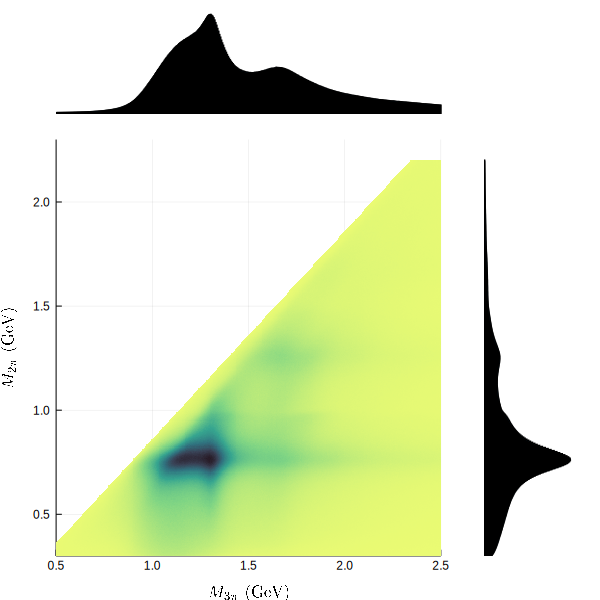

In [11]:
let sx = content["bin centers"][1], sy = content["bin centers"][2]
    vals = hcat([vcat(content["count"][i]...) for i in 1:length(content["count"])]...)
    mylayout = @layout [tophist           _
                         hist2d{0.8w,0.8h} righthist]
    plot(layout=mylayout, size=(600,600), link=:both)
    bar!(sx, (sum(vals,1))[1,:], lab="", grid=false,
        xaxis=nothing, yaxis=nothing, bottom_margin=0.0*mm,
        l=(2,:black), frame=:none,
        subplot=1, xlim=(0.5,2.5))
    projy = vcat((sum(vals,2))...)
    bar!(sy, projy, lab="", grid=false,
        xaxis=nothing, yaxis=nothing,
        l=(2,:black), frame=:none,
        subplot=3, dir=:h, ylim=(0.3,2.3), xlim=(0,1.4e6))
    heatmap!(sx, sy, [v!=0 ? v : NaN for v in vals], lab="", colorbar=false,
        xlab=L"M_{3\pi}\,\,(\mathrm{GeV})", ylab=L"M_{2\pi}\,\,(\mathrm{GeV})",
        top_margin=0.0*mm, c=:lime_grad,
        xlim=(0.5,2.5), ylim=(0.3,2.3), subplot=2)
end

#### Make projection per $2\pi$-bin and  $3\pi$-bin

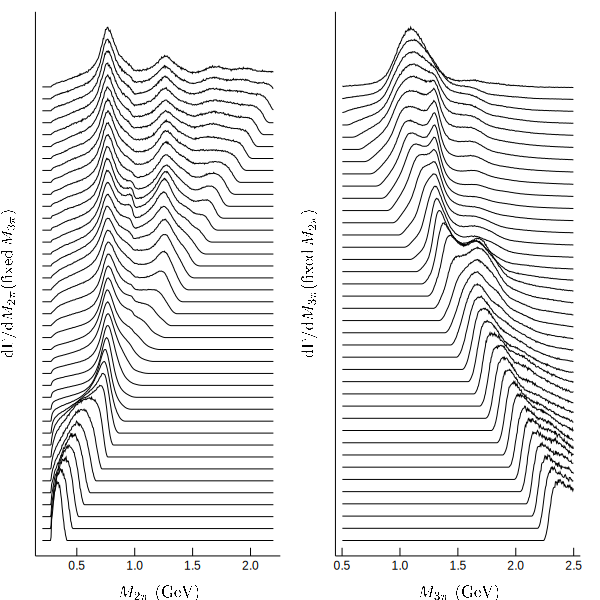

In [12]:
let
    p1 = let sx = content["bin centers"][1], sy = content["bin centers"][2]
        vals = hcat([vcat(content["count"][i]...) for i in 1:length(content["count"])]...)
        plot(size=(300,600),
            xlab=L"M_{2\pi}\,\,(\mathrm{GeV})",
            ylab=L"\mathrm{d}\Gamma/\mathrm{d}M_{2\pi}(\mathrm{fixed}\,M_{3\pi})",
            yticks = nothing)
        for i in 1:10:(size(vals,2)-10)
            cv = sum(vals[:,i:(i+10)],2)
            cv ./= max(cv...)
            cv .+= 0.02*i
            plot!(sy,cv, lab="", grid=false,
            l=(1,:black))
        end
        plot!()
    end
    p2 = let sx = content["bin centers"][1], sy = content["bin centers"][2]
        vals = hcat([vcat(content["count"][i]...) for i in 1:length(content["count"])]...)
        vals = vals'
        plot(size=(300,600),
            xlab=L"M_{3\pi}\,\,(\mathrm{GeV})",
            ylab=L"\mathrm{d}\Gamma/\mathrm{d}M_{3\pi}(\mathrm{fixed}\,M_{2\pi})",
            yticks = nothing)
        for i in 1:10:(size(vals,2)-10)
            cv = sum(vals[:,i:(i+10)],2)
            cv ./= max(cv...)
            cv .+= 0.02*((size(vals,2)-10)-i)
            plot!(sx,cv, lab="", grid=false,
            l=(1,:black))
        end
        plot!()
    end
    plot(p1,p2, size=(600,600))
end
